<a href="https://colab.research.google.com/github/DilshanBotheju/HandWrittenNumberRecognizer/blob/main/HandWrittenLetterRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install tensorflow scikit-learn

In [46]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
# Path to your text file
file_path = "/content/drive/MyDrive/LetterRecognizer/letters.csv"

# Having arrays to save images and labels respectively
imagePaths = []
labels = []

#Load the image paths and labels
with open(file_path, 'r') as file:
    next(file)
    for line in file:
        imagePath, label = line.strip().split(',')
        imagePaths.append(imagePath)
        labels.append(label)
print(imagePaths)
print(labels)

['/content/drive/MyDrive/LetterRecognizer/letters/img001-001.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-002.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-003.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-004.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-005.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-006.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-007.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-008.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-009.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-010.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-011.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-012.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-013.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-014.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-015.png', '/content

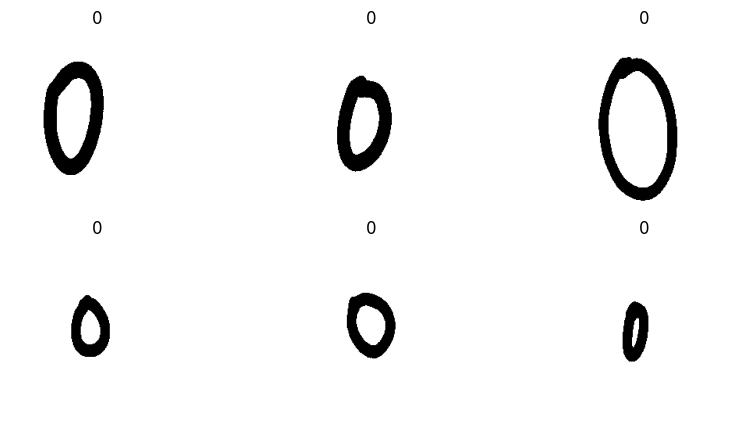

In [37]:
plt.figure(figsize=(10, 5))

for i in range(6):
    img_path = imagePaths[i]

    # Check if the image exists
    if os.path.exists(img_path):
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img) / 255.0

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis("off")
    else:
        print(f"Missing file: {img_path}")

plt.show()

# Image Preprocessing

In [48]:
# An array to store pre processed images
Preprocessed_images = []

# Define image generator for augmentation
datagen = ImageDataGenerator(

    # Randomly rotate images by up to 10 degrees
    rotation_range=10,
    # Shift width by 10%
    width_shift_range=0.1,
    # Shift height by up to 10%
    height_shift_range=0.1,
    # Shear transformation
    shear_range=0.2,
    # Zoom in/out by 20%
    zoom_range=0.2,
    # Randomly flip images by horizontally
    horizontal_flip=True,
    # Fill missing pixels
    fill_mode='nearest'
)

for imagePath in imagePaths:


    # Read the image in grayscale
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

    # Resize the images
    image = cv2.resize(image, (224, 224))

    # Normalize the images
    image = image / 255.0

    # Thresholding
    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

    # Noise reduction using guassina blur
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply edge detection using canny
    image = cv2.Canny((image*255).astype(np.uint8), 100, 200)

    # Apply data augmentation
    image = image.reshape((1, 224, 224, 1))
    augmented_images = datagen.flow(image, batch_size=1)

    Preprocessed_images.append(image)

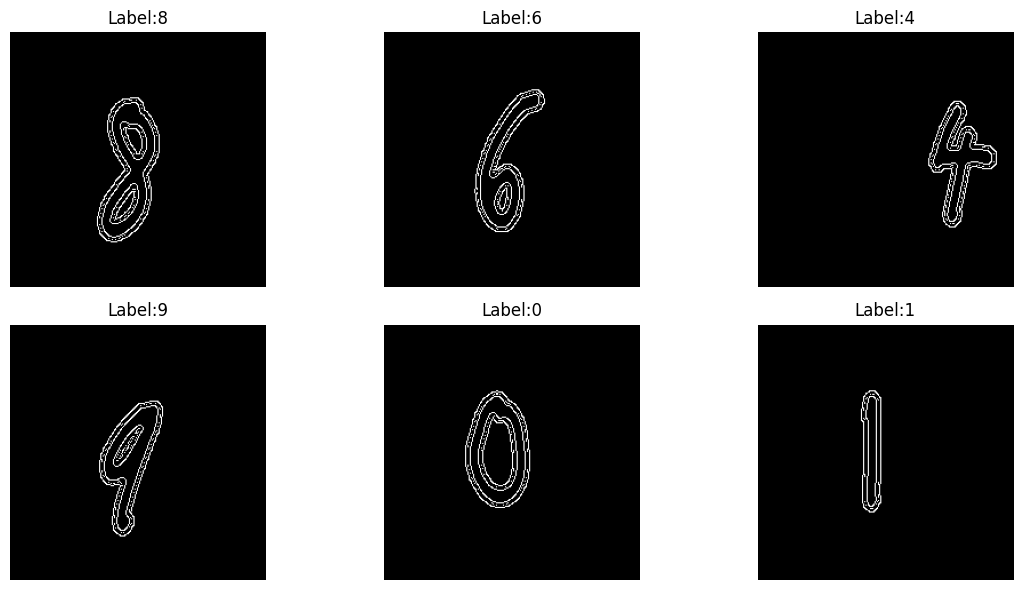

In [55]:
# Display random preprocessed images
plt.figure(figsize=(12, 6))
if len(Preprocessed_images) > 0:
    random_indices = random.sample(range(len(Preprocessed_images)), min(6, len(Preprocessed_images)))

    for i, idx in enumerate(random_indices):
        img = Preprocessed_images[idx]

        # Reshape from (1, 224, 224, 1) to (224, 224)
        if img.ndim == 4:
            img = img[0, :, :, 0]

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label:{labels[idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No preprocessed images found.")


In [60]:
# Reshaping images from (1,224,224,1) t0 (224,224,1)
processed_images = []

for image in Preprocessed_images:
    image = image.reshape((224, 224,1))
    processed_images.append(image)

(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)


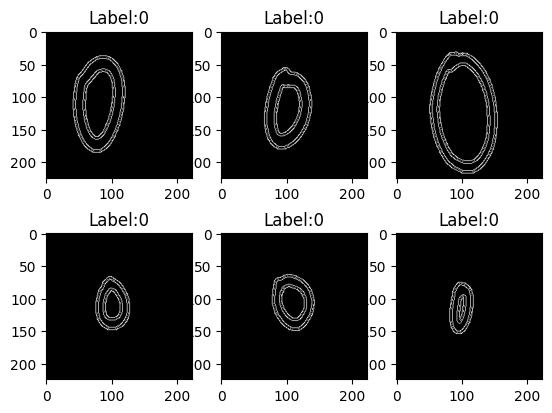

In [62]:
# Display reshaped images
for i in range(6):
    img = processed_images[i]
    print(img.shape)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label:{labels[i]}")

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = np.expand_dims(encoded_labels, axis=-1)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming the images are in grayscale with shape (224, 224, 1)
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output to connect to fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Adjust the number of output units based on your labels

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,674 (42.61 MB)

 Trainable params: 11,169,674 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Preprocessed_images, encoded_labels, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))  # Adjust the output layer based on unique labels

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])